Mandelbrot set implementation

In [11]:
import cmath
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.stats import qmc
import sympy

In [12]:
# def mandelbrot_check(c, max_iterations):
#     z = 0
#     for n in range(max_iterations):
#         z = z**2 + c
#     return abs(z) <= 2

def mandelbrot_iterations(c, max_iterations):
    z = 0
    n = 0
    while abs(z) <= 2 and n < max_iterations:
        z = z**2 + c
        n += 1
    return n

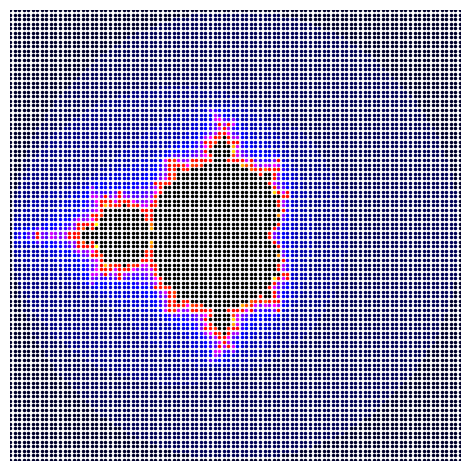

In [13]:
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
x_grid, y_grid = np.meshgrid(x, y)

complex_grid = x_grid - y_grid * 1j
max_iterations = 300

c_list_in_x = []
c_list_in_y = []

c_list_out_x = []
c_list_out_y = []
color_out = []
for c_row in complex_grid:
    for c in c_row:
        n =  mandelbrot_iterations(c, max_iterations)
        if n == max_iterations:
            c_list_in_x.append(c.real)
            c_list_in_y.append(c.imag)
        else:
            percentage_diverge = (n/max_iterations)*100
            c_list_out_x.append(c.real)
            c_list_out_y.append(c.imag)
            color_out.append(percentage_diverge)

for i in range(len(color_out)):
    if color_out[i] <= 2:
        plt.plot(c_list_out_x[i],c_list_out_y[i], marker = 'o', ls = 'none', markersize = 1.5, color = (0,0,color_out[i]/2))
    elif color_out[i] <= 4:
        plt.plot(c_list_out_x[i],c_list_out_y[i], marker = 'o', ls = 'none', markersize = 1.5, color = ((color_out[i]-2)/2,0,1))
    else:
        plt.plot(c_list_out_x[i],c_list_out_y[i], marker = 'o', ls = 'none', markersize = 1.5, color = (1,(color_out[i]-4)/96,0))
    

plt.plot(c_list_in_x,c_list_in_y, marker = 'o', ls = 'none', markersize = 1.5, color = (0,0,0))
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.gca().set_aspect("equal")
plt.axis("off")
plt.tight_layout()
plt.show()

In [83]:
def random_sampling(samples, visual = 'no', xmin = -2, xmax = 2, ymin = -2, ymax = 2):
    c_list = []
    x_list, y_list = [], []

    for s in range(1, samples):
        x, y = np.random.uniform(xmin, xmax), np.random.uniform(ymin, ymax)
        x_list.append(x)
        y_list.append(y)
        c = x - y * 1j
        c_list.append(c)

    if visual == 'visualise':
        return c_list, x_list, y_list
    else:
        return c_list

In [88]:
def hypercube_or_ortho(samples, sample_type = 'hyper', visual = 'no', xmin = -2, xmax = 2, ymin = -2, ymax = 2):
    if sample_type == 'hyper':
        sampler = qmc.LatinHypercube(d = 2)
        sample = sampler.random(n = samples)
    
    if sample_type == 'ortho':
        for s in sympy.primerange(0, np.sqrt(samples)):
            if s**2 < samples:
                s_square = s**2
        sampler = qmc.LatinHypercube(d = 2, strength = 2)
        sample = sampler.random(n = s_square)

    l_bounds = [xmin, ymin]
    u_bounds = [xmax, ymax]
    sample_scaled = qmc.scale(sample, l_bounds, u_bounds)
    x_list = sample_scaled[:, 0]
    y_list = sample_scaled[:, 1]
    
    c_list = []
    for ax in range(len(x_list)):
        c = x_list[ax] - y_list[ax] * 1j
        c_list.append(c)

    if visual == 'visualise':
        return c_list, x_list, y_list
    else:
        return c_list

In [51]:
def ortho_area_mandelbrot(samples, tot_area, max_iterations, xmin = -2, xmax = 2, ymin = -2, ymax = 2):
    # for s in range(4, samples):
    for s in sympy.primerange(0, np.sqrt(samples)):
        s_square = s**2
        if s_square < samples:
    
    sampler = qmc.LatinHypercube(d = 2, strength = 2)
    sample = sampler.random(n = s_square)
    l_bounds = [xmin, ymin]
    u_bounds = [xmax, ymax]
    sample_scaled = qmc.scale(sample, l_bounds, u_bounds)
    x_list = sample_scaled[:, 0]
    y_list = sample_scaled[:, 1]

IndentationError: expected an indented block after 'if' statement on line 5 (3916429413.py, line 7)

In [90]:
def area_mandelbrot(max_iter, samples, runs, sampling_type = 'random', visual = 'no', tot_area=16):
    area_runs = []
    for r in range(runs):
        in_num = 0
        if sampling_type == 'random':
            if visual == 'visualise':
                c_list, x_list, y_list = random_sampling(samples, 'visualise')
            else:
                c_list = random_sampling(samples)
        elif sampling_type == 'hyper':
            if visual == 'visualise':
                c_list, x_list, y_list = hypercube_or_ortho(samples, 'hyper', 'visualise')
            else:
                c_list = hypercube_or_ortho(samples)
        elif sampling_type == 'ortho':
            if visual == 'visualise':
                c_list, x_list, y_list = hypercube_or_ortho(samples, 'ortho', 'visualise')
            else:
                c_list = hypercube_or_ortho(samples, 'ortho')
        
        for c in c_list:
            n =  mandelbrot_iterations(c, max_iter)
            if n == max_iter:
                in_num += 1
        area_runs.append((in_num/samples)*tot_area)

    area = np.mean(area_runs)
    std = np.std(area_runs)
    if visual == 'visualise':
        return area, std, x_list, y_list
    else:
        return area, std

# def area_mandelbrot(max_iter, samples, runs, xmin = -2, xmax = 2, ymin = -2, ymax = 2):
#     tot_area = (abs(xmin)+abs(xmax))*(abs(ymin)+abs(ymax))

#     area_runs = []
#     for r in range(runs):
#         in_num = 0
#         for s in range(1, samples):
#             x, y = np.random.uniform(xmin, xmax), np.random.uniform(ymin, ymax)
#             c = x - y * 1j
#             n =  mandelbrot_iterations(c, max_iter)
#             if n == max_iter:
#                 in_num += 1
#         area_runs.append((in_num/samples)*tot_area)

#     area_s = np.mean(area_runs)
#     std_area_s = np.std(area_runs)
#     return area_s, std_area_s

100
200
300
400
500


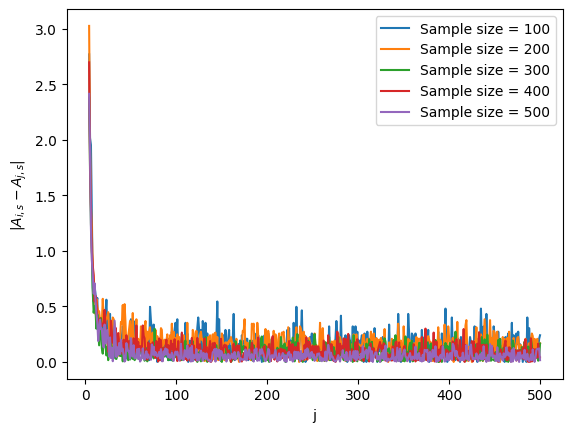

In [24]:
samples = 501
iterations = 501
runs = 10

j_list = []
for j in range(4, iterations):
    j_list.append(j)

diffs_sample = []
sample_list = []
for sample in range(100, samples, 100):
    print(sample)
    sample_list.append(sample)

    total = area_mandelbrot(iterations,sample,runs)[0]
    diffs = []
    for j in j_list:
        area, _ = area_mandelbrot(j, sample, runs)
        diffs.append(abs(total-area))

    diffs_sample.append(diffs)

for index in range(len(diffs_sample)):
    plt.plot(j_list, diffs_sample[index], label = f"Sample size = {sample_list[index]}")

plt.legend()
plt.ylabel('$|A_{i,s} - A_{j,s}|$')
plt.xlabel('j')
plt.show()

1.3456000000000001


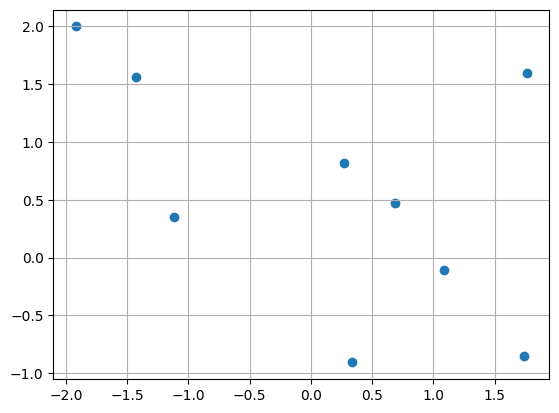

1.472


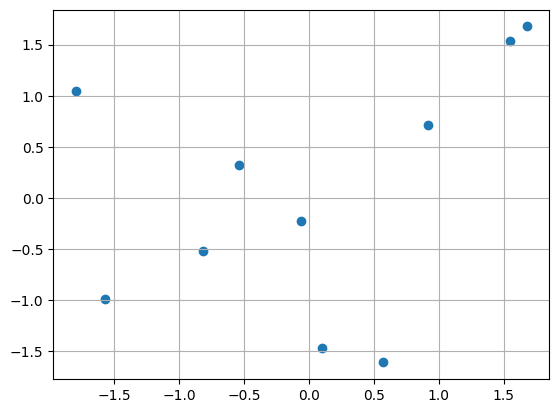

1.3792


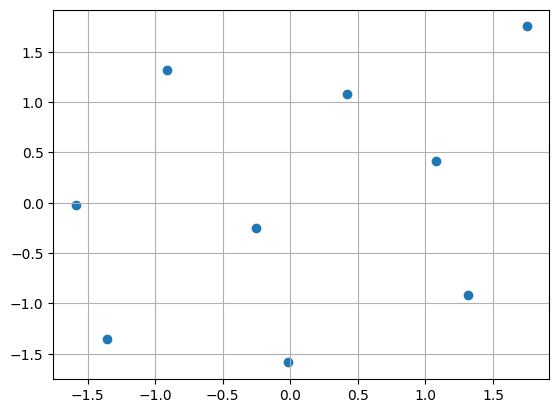

In [95]:
# visualise
iterations = 301
samples = 10
runs = 1000

area_rand, std_rand, x_list, y_list = area_mandelbrot(iterations, samples, runs, 'random', 'visualise')
print(area_rand)

fig, ax = plt.subplots()
ax.scatter(x_list, y_list)
ax.grid()
plt.show()

area_hyper, std_hyper, x_list, y_list = area_mandelbrot(iterations, samples, runs, 'hyper', 'visualise')
print(area_hyper)

fig, ax = plt.subplots()
ax.scatter(x_list, y_list)
ax.grid()
plt.show()

area_ortho, std_ortho, x_list, y_list = area_mandelbrot(iterations, samples, runs, 'ortho', 'visualise')
print(area_ortho)

fig, ax = plt.subplots()
ax.scatter(x_list, y_list)
ax.grid()
plt.show()

In [92]:
iterations = 301
samples = 301
runs = 1000

print(area_mandelbrot(iterations, samples, runs, 'random'))
print(area_mandelbrot(iterations, samples, runs, 'hyper'))
print(area_mandelbrot(iterations, samples, runs, 'ortho'))

(1.507986710963455, 0.2643461028417384)
(1.5184053156146178, 0.2004612290770624)
(1.4496744186046513, 0.08401389021510443)


In [26]:
def ortho_area_mandelbrot(samples, tot_area, max_iterations, xmin = -2, xmax = 2, ymin = -2, ymax = 2):
    # for s in range(4, samples):
    for s in sympy.primerange(0, np.sqrt(samples)):
        s_square = s**2
        if s_square < samples:
            sampler = qmc.LatinHypercube(d = 2, strength = 2)
            sample = sampler.random(n = s_square)
            l_bounds = [xmin, ymin]
            u_bounds = [xmax, ymax]
            sample_scaled = qmc.scale(sample, l_bounds, u_bounds)
            x_list = sample_scaled[:, 0]
            y_list = sample_scaled[:, 1]

    
    area_s = []
    for ax in range(len(x_list)):
        in_num = 0
        c = x_list[ax] - y_list[ax] * 1j
        n =  mandelbrot_iterations(c, max_iterations)
        if n == max_iterations:
            in_num += 1
        area_s.append(in_num)

    return sum(area_s)/len(area_s)*tot_area